<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2018 Practicum 
***

This practicum is due on Moodle by **11:55pm on Wednesday December 12**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your final exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on the practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**: Dominic B 

***


**NOTES**: 

- You may not use late days on the practicum nor can you drop your practicum grade. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3)

---

In [1]:
from scipy import stats
import numpy as np 
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [35 points] Problem 1: Yahtzee!

**Part A:** You are playing [Yahtzee](https://en.wikipedia.org/wiki/Yahtzee) with your friends. A player's turn in Yahtzee consists of rolling a set of 5 dice. Then the player is given two additional rolls, where they are allowed to re-roll any number of the dice, including potentially all of them or none of them. The goal is to obtain certain combinations of the dice values resulting after the third roll. Different combinations are worth different amounts of points, and the goal of the game is to get as many points as possible.

This game of Yahtzee is a bit unlike any you have ever played before, however. This is because Darth Ketelsen is back, and with her she brought her famous **5-sided dice**. These are fair dice with sides numbered 1-5. So, you are playing Yahtzee with a Sith Lord with 5-sided dice. Indeed, things just got real.

A **straight** in Darth Ketelsen's game consists of 5 values all in a row. For example, the outcome $[1,2,3,4,5]$ is a  straight but the outcome $[1,2,3,4,4]$ is not.

**Do two things:**
1. Compute by hand the probability of rolling a straight in a single roll of all 5 dice. Show all work.
2. Write a simulation to verify the probability that you computed. Run at least 10,000 simulations. 

$\dfrac{number~of~ways~to~get~a~straight}{number~of~total~possible~rolls} = \dfrac{5!}{5^5} = \dfrac{120}{3125} = 0.0384$

In [2]:
die = np.array([1,2,3,4,5])
num_sims = 10000
count = 0
for i in range(num_sims):
    rolls = np.random.choice(die, size = 5)
    if len(np.unique(rolls)) == 5:
        count += 1
print("Probability of rolling a straight =", count/num_sims)

Probability of rolling a straight = 0.0356


**Part B:** The goal of this problem is to compute the probability of getting a straight using all three of your rolls, instead of just the single roll approach that you computed in Part A. Here, we'll need to implement a strategy so that after the first roll and after the second roll, we keep the dice that get us closer to a straight and re-roll the dice that are not useful for our straight.

For instance, suppose your first roll comes up $[1,2,3,3,3]$. You really want to get that straight! So, you would follow the strategy of saving the $[1,2,3]$ and re-roll two of the threes, hoping for a 4 and 5 to get the straight. Then, for your third roll, you would save as many of the dice as possible that would be part of a straight, and re-roll any remaining dice.

Finish the function below called `dire_straights` to simulate many complete 3-roll turns, and computes the probability of ending your turn with a straight. The only input to the function should be `ntrial`, an integer for the number of turns to simulate. Remember, each turn consists of 3 rolls.

Then, use your function to estimate the probability of a straight after a full turn of Yahtzee. Use at least 10,000 simulations, and comment on the results.

In [3]:
def dire_straights(ntrial):
    
    die = np.array([1,2,3,4,5])    
    count = 0

    
    for i in range(ntrial):
        optimal = np.array([0,0,0,0,0])
        rolls = np.random.choice(die, size = 5)
        rolls = np.sort(rolls)
        
        for i in range(len(rolls)):
            optimal[rolls[i]-1] += 1
            
        re = 0    
        for i in range(len(optimal)):
            if optimal[i] == 0:
                re += 1
            else:
                optimal[i] = 1
        newRolls = np.random.choice(die, size = re)
        for i in range(len(newRolls)):
            optimal[newRolls[i]-1] += 1
        
        re = 0
        for i in range(len(optimal)):
            if optimal[i] == 0:
                re += 1
            else:
                optimal[i] = 1
        newRolls = np.random.choice(die, size = re)
        for i in range(len(newRolls)):
            optimal[newRolls[i]-1] += 1
            
        if len(np.unique(optimal)) == 1:
            count += 1
            
    return count/ntrial

In [4]:
dire_straights(10000)

0.2944

The probability of getting a straight after 2 re-rolls is significantly more than without re-rolls.

**Part C:** Write a simulation to estimate the probability of obtaining a straight if the first roll contains exactly three distinct unique values. For example, a valid first roll could be $[1,5,3,3,3]$ but not $[1,3,3,4,5]$. You are still using the set of 5-sided dice.

In [5]:
ntrial = 10000
die = np.array([1,2,3,4,5])    
count = 0


for i in range(ntrial):
    optimal = np.array([0,0,0,0,0])
    rolls = np.random.choice(die, size = 5)
    rolls = np.sort(rolls)

    for i in range(len(rolls)):
        optimal[rolls[i]-1] += 1

    re = 0    
    for i in range(len(optimal)):
        if optimal[i] == 0:
            re += 1
        else:
            optimal[i] = 1
    newRolls = np.random.choice(die, size = re)
    for i in range(len(newRolls)):
        optimal[newRolls[i]-1] += 1

    re = 0
    for i in range(len(optimal)):
        if optimal[i] == 0:
            re += 1
        else:
            optimal[i] = 1
    newRolls = np.random.choice(die, size = re)
    for i in range(len(newRolls)):
        optimal[newRolls[i]-1] += 1

    if len(np.unique(optimal)) == 1 and len(np.unique(rolls)) == 3:
        count += 1

print(count/ntrial)

0.108


**Part D:** Verify your calculation from Part C by hand. Show all work, and comment on whether the two agree.

*Hint: you will need to consider a variety of different cases - what are all the ways you could end up with a straight, given that your first roll contained exactly 3 unique values?*

$\dfrac{number~of~ways~to~get~a~straight}{number~of~total~possible~rolls} = \dfrac{3!}{3^3} \times \dfrac{2!}{2^1} = \dfrac{1}{9}$

**Part E:**  Your friend offers you the following deal. Each time your Yahtzee turn (i.e., all three rolls) results in a 5-of-a-kind, she will give you \$5. Each time your Yahtzee turn results in a straight, she will give you \$3. But, she will charge you \$1 for each turn (where a turn includes all 3 rolls of the five 5-sided dice). Should you take this deal? Fully justify your answer using calculations that include expected values. You may include some simulations to estimate relevant probabilities. Clearly state any assumptions you are making in your modeling choices.

We already know the probability of straight is about $0.11$.<br \>
We know the probability of 5-of-a-kind is about $0.08$.<br \>
$(0.11 \times 3) + (0.08 \times 5) + (0.82 \times -1) = -0.09$<br \>
I would not take this deal. The expected value would be $-0.09$ which means that based on the probability you would loose about $9$ cents on average.

In [6]:
ntrial = 10000
die = np.array([1,2,3,4,5])    
count = 0


for i in range(ntrial):
    optimal = np.array([0,0,0,0,0])
    rolls = np.random.choice(die, size = 5)
    rolls = np.sort(rolls)

    for i in range(len(rolls)):
        optimal[rolls[i]-1] += 1

    re = 0 
    large  =  0
    largest = 0
    for i in range(len(optimal)):
        if optimal[i] > large:
            large = optimal[i]
            largest = i
    re = 5 - large
    for i in range(len(optimal)):
            if i != largest:
                optimal[i] = 0

    newRolls = np.random.choice(die, size = re)
    for i in range(len(newRolls)):
        optimal[newRolls[i]-1] += 1
        
    re = 0   
    large  =  0
    largest = 0
    for i in range(len(optimal)):
        if optimal[i] > large:
            large = optimal[i]
            largest = i
    re = 5 - large
    for i in range(len(optimal)):
            if i != largest:
                optimal[i] = 0

    newRolls = np.random.choice(die, size = re)
    for i in range(len(newRolls)):
        optimal[newRolls[i]-1] += 1

    if len(np.unique(optimal)) == 2:
        count += 1
        
print(count/ntrial)

0.074


<br>

---
[Back to top](#top)
<a id='p2'></a>

### [30 points] Problem 2: Sharknado Prediction

Governor Hickenlooper has charged you with the task of assessing the factors associated with sharknado risk in Colorado. As everyone knows, sharknadoes are a leading cause of sharknado-related illness, and you are a world-renowned data/shark scientist.

You decide to use multiple linear regression to understand and predict what factors lead to increased sharknado hazard. Your lead scientist, aptly named Fin, has collected lots of relevant data at a local sharknado hotspot, the Boulder Reservoir[\*](#footnote). The data cover a variety of sharknado-related environmental and other conditions, and you'll find this data in the file `sharknadoes.csv`. 

**Response**: 

- $\texttt{sharknado hazard}$: the hazard of a sharknado, where 1 is very unlikely and 100 is highly likely

**Features**: 

- $\texttt{taunts}$: the number of times over the past year that someone has taunted a shark
- $\texttt{clouds}$: what percentage of the sky was covered by clouds (fraction, 0-1)
- $\texttt{precipitation}$: amount of precipitation in the past 72 hours (inches)
- $\texttt{earthquake}$: the intensity of the most recent earthquake measured in the continental United States
- $\texttt{shark attacks}$: the number of shark attacks within 72 hours prior to the observation
- $\texttt{ice cream sold}$: the number of units of ice cream sold at the beach concession stand 
- $\texttt{misery index}$: an economic indicator for how miserable the average United States citizen is, based on the unemployment rate and the inflation rate. More [here](https://www.stuffyoushouldknow.com/podcasts/whats-the-misery-index.htm) and [here](https://en.wikipedia.org/wiki/Misery_index_(economics)). Higher values correspond to more miserable citizens.
- $\texttt{temperature}$: the outside temperature, measured in degrees Fahrenheit
- $\texttt{humidity}$: relative humidity (percent, 0-100)
- $\texttt{pizzas sold}$: the number of pizzas sold at the beach concession stand in the past year
- $\texttt{pressure}$: local air pressure (millibar) 
- $\texttt{octopuses}$: the number of octupuses in the vicinity on the day of the observation
- $\texttt{Dan's shoe size}$: the size of the shoes Dan was wearing when the observation was made
- $\texttt{Tony's shoe size}$: the size of the shoes Tony was wearing when the observation was made

**Part A**: Read the data from `sharknadoes.csv` into a Pandas DataFrame.  Note that since we will be doing a multiple linear regression we will need all of the features, so you should drop any row in the DataFrame that is missing data. 

In [7]:
dfShark = pd.read_csv('data/sharknadoes.csv')
dfShark.dropna(inplace = True)
dfShark = dfShark.reset_index(drop=True)
dfShark.head()

,clouds,earthquake,pizzas sold,taunts,pressure,shark attacks,octopuses,precipitation,misery index,ice cream sold,humidity,temperature,Dans shoe size,Tonys shoe size,sharknado hazard
0,1.00,7.1,5560.0,15.0,847.12,2.0,7.0,0.824059,12.987180,273.0,86.41,78.0,42.0,9.0,40.22
1,1.00,7.4,5179.0,20.0,844.34,4.0,5.0,0.993296,16.765435,184.0,96.67,89.0,42.0,9.5,36.42
2,1.00,7.0,5227.0,0.0,839.48,9.0,2.0,1.173342,16.494518,141.0,53.85,65.0,9.5,9.0,19.54
3,0.13,7.9,5226.0,34.0,851.28,2.0,6.0,0.919291,8.277176,146.0,88.72,36.0,9.5,10.0,85.00
4,1.00,7.5,5491.0,6.0,852.67,2.0,4.0,1.729127,5.904750,178.0,63.08,72.0,42.0,9.0,56.34


**Part B**: Perform the appropriate statistical test at the $\alpha = 0.01$ significance level to determine if _at least one_ of the features is related to the the response $y$.  Clearly describe your methodology and show all computations in Python. 

With $n$ features.<br \>

$H_0: \beta _n = 0$

$H_1: \beta _n \ne 0$ , For at least one value of $n \ne 0$

In [8]:
y = dfShark.loc[:,"sharknado hazard"]
X = dfShark.loc[:, dfShark.columns != "sharknado hazard"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       sharknado hazard   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           9.60e-42
Time:                        23:42:10   Log-Likelihood:                -174.23
No. Observations:                  72   AIC:                             378.5
Df Residuals:                      57   BIC:                             412.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2549.8985     67.605    -37.718      0.000   -2685.275   -2414.522
clouds             -1.5106      2.566     -0.589      0.558      -6.650       3.628
earthquake          2.5079      0.467      5.367      0.000       1.572       3.444
pizzas sold        -0.0006      0.002     -0.373      0.711      -0.004       0.003
taunts              0.3117      0.042      7.447      0.000       0.228       0.396
pressure            3.0688      0.079     38.850      0.000       2.911       3.227
shark attacks      -0.1151      0.144     -0.797      0.429      -0.404       0.174
octopuses          -0.0749      0.143     -0.524      0.602      -0.361       0.211
precipitation       1.3982      0.930      1.503      0.138      -0.464       3.261
misery index        0.0273      0.080      0.340      0.735      -0.133       0.188
ice cream sold      0.0096      0.008      1.193      0.238      -0.007       0.026
humidity            0.0188      0.027      0.706      0.483      -0.035       0.072
temperature        -0.4426      0.053     -8.396      0.000      -0.548      -0.337
Dans shoe size      0.0271      0.023      1.175      0.245      -0.019       0.073
Tonys shoe size     0.2814      1.273      0.221      0.826      -2.268       2.831
==============================================================================
Omnibus:                        0.821   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.300
Skew:                           0.005   Prob(JB):                        0.861
Kurtosis:                       3.316   Cond. No.                     1.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I created a multiple linear regression using the data and used the statsmodel's summary to determine that there is at least one feature related to the response.The computed p-values associated with taunts, earthquake, temperature, and pressure are all below the $\alpha = 0.01$ significance level. The p-value for the $F$-statistic is also below the $\alpha = 0.01$ significance level which means we can reject the null hypothesis and conclude that at least one of the features has an effect on the response.

**Part C**: Write a function `backward_select(df, resp_str, maxsse)` that takes in the DataFrame (`df`), the name of the column corresponding to the response (`resp_str`), and the maximum desired sum of squared errors (`maxsse`), and returns a list of feature names corresponding to the most important features via backward selection.  Use your code to determine the reduced MLR model with the minimal number of features such that the SSE of the reduced model is less than 570. At each stage in backward selection you should remove the feature that has the highest p-value associated with the hypothesis test for the given slope coefficient $\beta_k \neq 0$.

Your code should clearly indicate which feature was removed in each stage, and the SSE associated with the model fit before the feature's removal. _Specifically, please write your code to print the name of the feature that is going to be removed and the SSE before its removal_. Afterward, be sure to report all of the retained features and the SSE of the reduced model.

**Note**: The point of this exercise is to see if you can implement **backward_select** yourself.  You may of course use canned routines like statmodels OLS, but you may not call any Python method that explicitly performs backward selection.

In [9]:
def backward_select(df, resp_str, maxsse):
    sse = 0
    oldsee = 0
    remaining_features = []

    while sse < maxsse:
        y = df.loc[:, resp_str]
        X = df.loc[:, df.columns != resp_str]

        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        oldsse = sse
        sse = model.ssr
        if sse < maxsse:
            hp = 0
            npn = 0
            for i in range(1,df.columns.size):
                if model.pvalues[i] > hp:
                    hp = model.pvalues[i]
                    hpn = i -1
            print("Dropping {:s} with SSE of {:.2f}".format(df.columns[hpn],model.ssr))
            df = df.drop(df.columns[hpn], axis=1)
    for i in range(df.columns.size - 1):
        remaining_features.append(df.columns[i])
        #remaining_features = df.columns
    print("")
    print("Remaining Features:",remaining_features)
    print("Final SSE: {:.2f}".format(oldsse))
    return remaining_features

In [10]:
backward_select(dfShark,"sharknado hazard",570)

Dropping Tonys shoe size with SSE of 532.94
Dropping misery index with SSE of 533.40
Dropping octopuses with SSE of 534.69
Dropping clouds with SSE of 536.51
Dropping pizzas sold with SSE of 539.50
Dropping humidity with SSE of 543.36
Dropping shark attacks with SSE of 547.41
Dropping Dans shoe size with SSE of 552.15
Dropping ice cream sold with SSE of 564.11

Remaining Features: ['earthquake', 'taunts', 'pressure', 'precipitation', 'temperature']
Final SSE: 564.11


['earthquake', 'taunts', 'pressure', 'precipitation', 'temperature']

**Part D**: Write down the multiple linear regression model, including estimated parameters, obtained by your backward selection process. 

In [11]:
df = dfShark    
resp_str = "sharknado hazard"
maxsse = 570
sse = 0

while sse < maxsse:
    y = df.loc[:, resp_str]
    X = df.loc[:, df.columns != resp_str]

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    sse = model.ssr
    if sse < maxsse:
        hp = 0
        npn = 0
        for i in range(1,df.columns.size):
            if model.pvalues[i] > hp:
                hp = model.pvalues[i]
                hpn = i -1
        df = df.drop(df.columns[hpn], axis=1)

model.params

const           -2562.633166
earthquake          2.234097
taunts              0.323122
pressure            3.087171
precipitation       1.238847
temperature        -0.435348
dtype: float64

$\texttt{sharknado hazard} = -2562.633 + 2.234 \times \texttt{earthquake} + 0.323 \times \texttt{taunts} + 3.087 \times \texttt{pressure} + 1.239 \times \texttt{precipitation} - 0.435 \times \texttt{temperature}$

**Part E**: Perform the appropriate statistical test at the $\alpha = 0.01$ significance level to determine whether there is a statistically significant difference between the full model with all features and the reduced model obtained by backward selection in **Part D**. You may use output from your model fit above, but all calculations should be set up in Markdown/MathJax.

$F = \dfrac{SSE_{red}~/~df_{red}}{SSE_{full}~/~df_{full}}$

$p = 14$ number of features in full model

$k = 5$ number of features in reduced model

$SSE_{red} = 564.11$

$SSE_{full} = 532.94$

$F = \dfrac{564.11~/~4}{532.94~/~13} = 3.44$

$1-stats.f.cdf(3.44,4,13) = 0.038$

Since the p-value, $0.038$, is greater than $0.01$ we reject the null hypothesis at this significance level. This means that there is not sufficient evidence to determine whether there is a statistically significant difference between the full model with all features

In [12]:
print("p-value =", 1-stats.f.cdf(3.44,4,13))

p-value = 0.039782502599688074


**Part F**: Based on your conclusions in **Part E**, use the _better_ of the two models to predict the sharknado hazard when the following features are observed: 

- $\texttt{taunts}$: 47
- $\texttt{clouds}$: 0.8
- $\texttt{precipitation}$: 1 inch
- $\texttt{earthquake}$: 5
- $\texttt{shark attacks}$: 11
- $\texttt{ice cream sold}$: 120
- $\texttt{misery index}$: 15
- $\texttt{temperature}$: 70 degrees F
- $\texttt{humidity}$: 83
- $\texttt{pizzas sold}$: 5500
- $\texttt{pressure}$: 850 millibar 
- $\texttt{octopuses}$: 6
- $\texttt{Dan's shoe size}$: 9.5
- $\texttt{Tony's shoe size}$: 9

In [13]:
sharknadohazard = -2562.633 + 2.234 * 5 + 0.323 * 57 + 3.087 * 850 + 1.239 * 1 - 0.435 * 70
print("Predicted Sharknado Hazard using Reduced Model = {:.3f}".format(sharknadohazard))

Predicted Sharknado Hazard using Reduced Model = 61.687


**Part G:** Consider the model you used in Part E, and consider the fact that you are trying to predict **sharknado hazard**. What is one critical drawback to the MLR model (or any MLR model) for predicting shardnado hazard? What are some modifications that could improve on this issue?

Not all of the features are as related or relevant to sharknado hazards as others. By only using the most related features you could more accurately predict sharknado hazards.

<br>

---
[Back to top](#top)
<a id='p3'></a>

### [35 points] Problem 3: FlipMaster5000

In the file `flips.csv` you'll find the results of an experiment that was conducted with Stella O'Flaherty (the famous octopus data scientist) flipping coins. Her experiment was as follows. 

1. She reaches into her coin purse and grabs one of two coins, labeled $x$ and $y$. 
2. She flips her coin until it comes up heads 8 times, and records the coin ID and the number of flips it took to get 8 heads. 
3. She then replaces the coin in her coin purse and repeats the experiment. 

**Part A:**

By considering the total number of flips and the total number of "heads" in the data file for each coin, estimate the bias of each coin $p_x$ and $p_y$, and use an appropriate statistical test to determine whether the coins have the same bias, i.e. whether $p_x$ and $p_y$ are the same. Perform your test at a significance level that will mistakenly reject the null hypothesis _when that null hypothesis is actually true_ 5% of the time. Report a p-value for your test, and clearly state your conclusions.

In [14]:
dfFlips = pd.read_csv('data/flips.csv', delimiter="\t")
dfFlips.head()

,Coin ID,Flips Required
0,x,9
1,x,13
2,x,12
3,y,12
4,y,20


In [15]:
dfFlipsX = dfFlips[dfFlips["Coin ID"] == "x"]
dfFlipsY = dfFlips[dfFlips["Coin ID"] == "y"]

nx = dfFlipsX["Flips Required"].sum()
ny = dfFlipsY["Flips Required"].sum()

hx = dfFlipsX["Coin ID"].size * 8
hy = dfFlipsY["Coin ID"].size * 8

xbias = hx/nx
ybias = hy/ny

print("Bias of coin X: {:.2f}".format(xbias))
print("Bias of coin Y: {:.2f}".format(ybias))

Bias of coin X: 0.71
Bias of coin Y: 0.50


$H_0: p_x = p_y$ (the bias is the same for both coins)

$H_1: p_x \ne p_y$ (the bias is **not** the same for both coins) 

In [16]:
num = xbias - ybias
p = (hx+hy)/(nx+ny)
denom = np.sqrt(p*(1-p)*((1/nx)+(1/ny)))
z = num/denom
pvalue = 1 - stats.norm.cdf(z)
print("p-value = {:.2f}".format(pvalue))

p-value = 0.04


The p-value = $0.04 < \alpha = 0.05$. This means at the $\alpha = 0.05$ significance level we can reject the null hypothesis and conclude that $p_x$ and $p_y$ are the same.

**Part B:** 

You learn that, actually, the coin $x$ is from a manufacturer that produces coins whose biases follow some statistical regularity. In particular, the bias of the $x$ coin is in the set $$p_x \in \{0.1, 0.2, 0.3, \dots, 0.9\}.$$ Furthermore, these biases all occur with equal probability. In other words, $\tfrac{1}{9}$ of coins have bias $p_x=0.1$, $\tfrac{1}{9}$ of coins have bias $p_x=0.2$, and so on. 

For each possible value of $p_x$, compute the probability that Stella's $x$ coin has bias of $p_x$, given the data in her data file. 

Plot your results with $p_x$ on the horizontal axis and $Pr(p_x \mid \text{data})$ on the vertical axis. Make the points or lines that you plot blue. Plots without axis labels will receive zero credit.

_Hint_: We have done problems like this before! Think back to how you solved the problem on the midterm where you determined the probability that someone had ESP, given that they guessed the cards correctly. There was a "rule", and maybe a "law" involved in your calculation...

Bayes' Thorem:

$P(p_x \mid \text{data}) = \dfrac{p(\text{data} \mid p_x)p(p_x)}{p(\text{data})}$

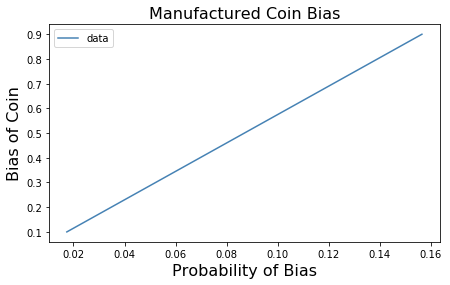

In [17]:
x,y = [],[]
for i in range(1,10):
    x.append(((1/9)*(i/9))/(.71))
    y.append(i/10)
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,4))
plt.plot(x, y, color="steelblue", label='data')
plt.legend()
ax.set_xlabel("Probability of Bias", fontsize=16)
ax.set_ylabel("Bias of Coin", fontsize=16)
ax.set_title("Manufactured Coin Bias", fontsize=16)
plt.show()

**Part C:**

You learn that, actually, the coin $y$ is from a different manufacturer that produces coins whose biases follow some statistical regularity. In particular, the bias of the $y$ coin is in the set $$p_y \in \{0.1, 0.2, 0.3, \dots, 0.9\}.$$ Furthermore, these biases all occur with different probability. In particular, the probability that a coin has bias $p_y$ is proportional to $p_y$, which could be written as 
$$Pr(p_y) \propto p_y \quad \text{for} \quad p_y \in \{0.1, 0.2, 0.3, \dots, 0.9\}$$

First, write clearly the PMF for $p_y$, based on the information above. 

Then, for each possible value of $p_y$, compute the probability that Stella's $y$ coin has bias of $p_y$, given the data in her data file. 

Plot your results with $p_y$ on the horizontal axis and $Pr(p_y \mid \text{data})$ on the vertical axis. Make the points or lines that you plot red. Plots without axis labels will receive zero credit.

$P(p_y = 0.1) = 0.1$<br \>
$P(p_y = 0.2) = 0.2$<br \>
$P(p_y = 0.3) = 0.3$<br \>
$P(p_y = 0.4) = 0.4$<br \>
$P(p_y = 0.5) = 0.5$<br \>
$P(p_y = 0.6) = 0.6$<br \>
$P(p_y = 0.7) = 0.7$<br \>
$P(p_y = 0.8) = 0.8$<br \>
$P(p_y = 0.9) = 0.9$<br \>

Bayes' Thorem:

$p(p_y \mid \text{data}) = \dfrac{p(\text{data} \mid p_y)p(p_y)}{p(\text{data})}$

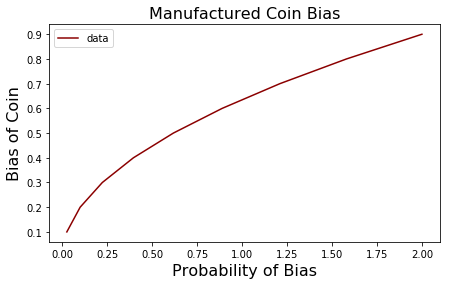

In [18]:
x,y = [],[]
for i in range(1,10):
    x.append(((i/9)*(i/9))/(.5))
    y.append(i/10)
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,4))
plt.plot(x, y, color="darkred", label='data')
plt.legend()
ax.set_xlabel("Probability of Bias", fontsize=16)
ax.set_ylabel("Bias of Coin", fontsize=16)
ax.set_title("Manufactured Coin Bias", fontsize=16)
plt.show()

**Part D:**

The information that you have about the manufacturer of coin $x$ and coin $y$ is called _prior information_ since it can influence the estimates of a coin's bias at which you arrive, given the data from the coin's flipping. We often call the distribution $Pr(p_x)$ or $Pr(p_y)$ a _prior distribution_, and call $Pr(p_x \mid \text{data})$ or $Pr(p_y \mid \text{data})$ a _posterior distribution_, since it represents the estimate that you arrive at after you have taken the data into account. 

You have already computed posterior distributions for each coin's bias. However, you'll now investigate the importance of the prior by _switching the priors for the two coins_.

In other words, using the prior probabilities $Pr(p_x)$, what is your posterior distribution of $Pr(p_y \mid \text{data from y})$? Similarly, using the prior probabilities $Pr(p_y)$, what is your posterior distribution of $Pr(p_x \mid \text{data from x})$? 

Create two plots. 

1. In the first plot, show your results from Part B (the posterior distribution for $p_x$ with the correct prior) plotted with a blue solid line as well as your results from Part D for the posterior distribution for $p_x$ with the incorrect prior with a blue dashed line.  

2. In the second plot, show your results from Part C (the posterior distribution for $p_y$ with the correct prior) with a red solid line as well as your results from Part D for the posterior distribution for $p_y$ with the incorrect prior with a red dashed line.  

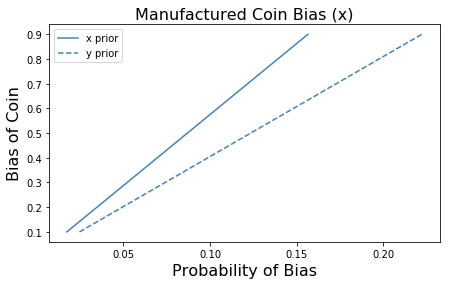

In [19]:
x,y,x2 = [],[],[]
for i in range(1,10):
    x.append(((1/9)*(i/9))/(.71))
    x2.append(((1/9)*(i/9))/(.5))
    y.append(i/10)
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,4))
plt.plot(x, y, color="steelblue", label='x prior')
plt.plot(x2, y, color="steelblue", label='y prior', linestyle='--')
plt.legend()
ax.set_xlabel("Probability of Bias", fontsize=16)
ax.set_ylabel("Bias of Coin", fontsize=16)
ax.set_title("Manufactured Coin Bias (x)", fontsize=16)
plt.show()

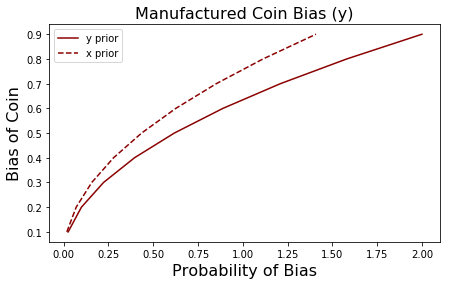

In [20]:
x,y,x2 = [],[],[]
for i in range(1,10):
    x.append(((i/9)*(i/9))/(.5))
    x2.append(((i/9)*(i/9))/(.71))
    y.append(i/10)
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,4))
plt.plot(x, y, color="darkred", label='y prior')
plt.plot(x2, y, color="darkred", label='x prior', linestyle='--')
plt.legend()
ax.set_xlabel("Probability of Bias", fontsize=16)
ax.set_ylabel("Bias of Coin", fontsize=16)
ax.set_title("Manufactured Coin Bias (y)", fontsize=16)
plt.show()

**Part E:**

What is the name of the distribution that Stella's experiment is drawn from?

Geometric Distribution

<br>

---
[Back to Problem 2](#p2)

<a id='footnote'></a> Yeah yeah - fresh water versus salt water - I know, I know. But sharknadoes also are not real, so...